In [ ]:
# lets find shocked entropy again but this time in a non commutative background theory
# the non-com term doesnt show up at all in the area or in the shock integrals, so i expect the effects to onlny add "linearly" with the unshocked strips in mutinf
# note that i use (r,t,x) coords which break convention from Willy's paper (1307.2932), should not be a significant issue due to unit selection and that u \propto r

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
import numpy as np
import scipy as sp

In [5]:
# like before, lets set some precision and a UV cutoff...
rmax = 1000000000
num = 500

In [7]:
# define some useful functions
def f(r,R):
    return 1 - ((R/r)**4)

def fp(r,R):
    return 1 + 4*(R**4)/(r**5)

def beta(R):
    return 4 * np.pi / fp(R,R)

def gamma2(r0,R):
    return -(r0**8)*f(r0,R)

# define interior radial cutoff for imaginary dt
def determ(r,R,r0):
    return 1 + (r**8)*f(r,R)/gamma2(r0,R)

In [38]:
# we need to quickly define a divergent integrand for k2 because shit blows up otherwise. look at the things in goodnotes and youll be convinced that this is true:
def k2divint(r,R):
    return 1/f(r,R)

In [57]:
# now we want to define the big integrals which go into alpha
# there will still need to be a radial cutoff for k3...
def k1(r0grid,R):
    list = []
    for i in range(num):
        r0 = r0grid[i]
        rbar = r0grid.min()/2
        rgrid = np.linspace(rbar,r0,num)
        integ = 1/f(rgrid,R)
        mask = np.isfinite(integ)
        sum = (4*np.pi/beta(R)) * np.trapezoid(integ[mask],rgrid[mask])
        list.append(sum)
    return np.array(list)

def k2(r0grid,R):
    list = []
    for i in range(num):
        r0 = r0grid[i]
        rgrid = np.logspace(np.log10(R+0.1),np.log10(rmax-0.1),num)
        # print(rgrid)
        integ = ((1 - 1/((rgrid**2) * np.sqrt(determ(rgrid,R,r0))))/f(rgrid,R)) - k2divint(rgrid,R)
        # print(integ)
        mask = np.isfinite(integ)
        sum = (2*np.pi/beta(R)) * np.trapezoid(integ[mask],rgrid[mask])
        list.append(sum)
    return np.array(list)

def k3(r0grid,R):
    list = []
    for i in range(num):
        r0 = r0grid[i]
        bigrgrid = np.linspace(r0,0.999*R,num)
        detmask = determ(bigrgrid,R,r0) > 0
        if len(bigrgrid[detmask]) >= (num-2):
            bigrmin,bigrmax = bigrgrid[detmask].min(), bigrgrid[detmask].max()
            rgrid = np.linspace(bigrmin,bigrmax,num)
            integ = (1-1/((rgrid**2) * np.sqrt(determ(rgrid,R,r0))))/f(rgrid,R)
            for idx in range(len(integ)):
                if determ(rgrid[idx],R,r0) <= 0:
                    integ[idx] = 0
            mask = np.isfinite(integ)
            sum = (4*np.pi/beta(R)) * np.trapezoid(integ[mask],rgrid[mask])
            list.append(sum)
        else:
            list.append(0)
    return np.array(list)

In [58]:
def alpha(r0grid,R):
    return 2 * np.exp(k1(r0grid,R)+k2(r0grid,R)+k3(r0grid,R))

In [59]:
R = 2
r0min = 0.001
r0grid = np.linspace(0.001,0.999*R,num)

In [61]:
alphagrid = alpha(r0grid,R)

k1grid = k1(r0grid,R)


k2grid = k2(r0grid,R)


k3grid = k3(r0grid,R)

# i have had the genius idea of just ignoring the things that dont work
# surely this will not bite me in the ass later...
alphamask = k3grid != 0
r0grid = r0grid[alphamask]
alphagrid = alphagrid[alphamask]
k1grid = k1grid[alphamask]
k2grid = k2grid[alphamask]
k3grid = k3grid[alphamask]
normr0grid = r0grid/R

#need to fix the r0 bounds for all the recursive functions now
r0min, r0max = r0grid.min(), r0grid.max()

Text(0, 0.5, '$\\alpha$')

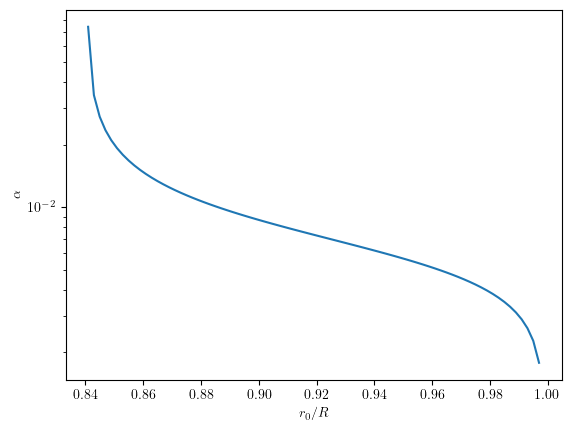

In [66]:
plt.plot(normr0grid,alphagrid)
# plt.xlim((1.5,2))
# plt.semilogx()
plt.semilogy()
plt.xlabel(r'$r_0/R$')
plt.ylabel(r'$\alpha$')

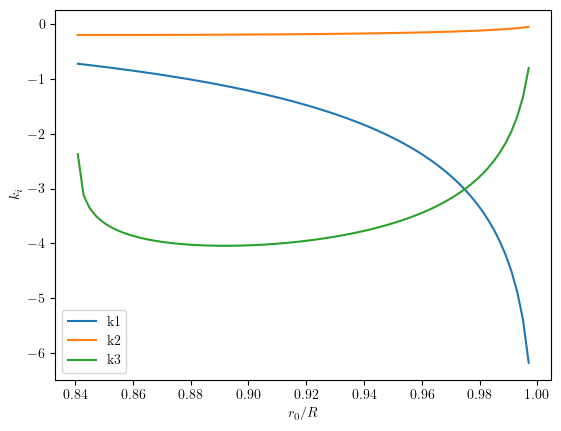

In [67]:
plt.plot(normr0grid,k1grid,label='k1')
plt.plot(normr0grid,k2grid,label='k2')
plt.plot(normr0grid,k3grid,label='k3')
plt.xlabel(r'$r_0 / R$')
plt.ylabel(r'$k_i$')
plt.legend()
# plt.semilogx()
# plt.semilogy()
plt.show()